In [1]:
from skimage import io, color, data  
import numpy as np 
img = io.imread('Lenna.png') 


In [2]:
img = img.astype(np.float64)

In [4]:

def  converter(img): 
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):  
            R =  img[x][y][0]/255.0 
            G = img[x][y][1]/255.0 
            B = img[x][y][2]/255.0  
            Cmax = max(R,G,B) 
            Cmin = min(R,G,B)  
            delta = Cmax - Cmin  
            
            if(delta == 0 ):
                H = 0
            elif(Cmax == R): 
                H  = 60 * (((G-B)/delta) % 6)
            elif (Cmax == G): 
                H = 60 * (((B-R)/delta) + 2 ) 
            else: 
                H = 60 * (((R-G)/delta) + 4)  
            
            if(Cmax == 0):
                S = 0 
            else:
                S = delta/Cmax   
            
            H = H/360 
            V = Cmax   
            img[x][y][0] = H    
            img[x][y][1] = S  
            img[x][y][2]= V 
        
    return img          

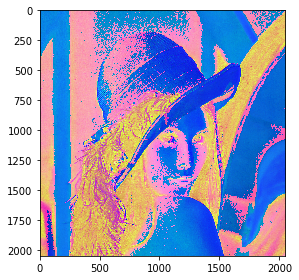

In [6]:
io.imshow(img)

In [1]:
import matplotlib.pyplot as plt
import numpy as np  
from skimage import io, color, data   
import cv2


In [2]:
img = cv2.imread('cutie.jpg')

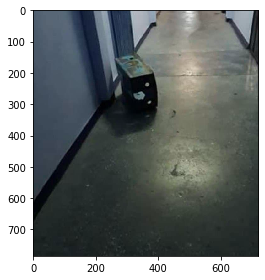

In [3]:
io.imshow(img)

In [4]:
img = cv2.resize(img, dsize = (300,300)) 

In [5]:
def contrast_br(img,contrast,brightness): 
    new_image = np.zeros(img.shape, img.dtype)
    for y in range(img.shape[0]):
        for x in range(img.shape[1]): 
            for c in range (img.shape[2]): 
                if (contrast == 0 ):
                    new_image[y,x,c] = np.clip(1*img[y,x,c] + brightness, -255, 255) 
                else:
                    new_image[y,x,c] = np.clip(contrast*img[y,x,c] + brightness, -255, 255)
                    
    return new_image

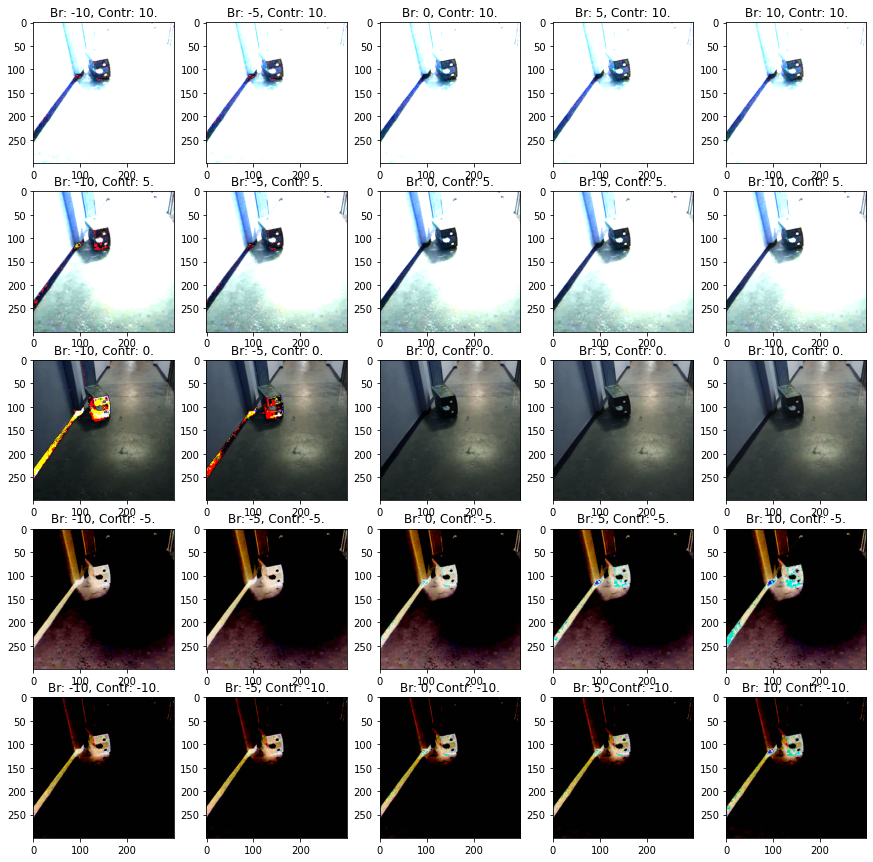

In [6]:
f, ax = plt.subplots(5,5)    
f.set_figwidth(15)
f.set_figheight(15)

con = 10 

for x in range(5): 
    br = -10
    for y in range(5):  
        res = contrast_br(img,con,br)
        ax[x,y].imshow(res) 
        ax[x, y].set_title(f'Br: {br}, Contr: {con}.')   
        br+=5 
    con-=5


In [1]:
import matplotlib.pyplot as plt
import numpy as np   
from skimage import io, color, data   
import cv2    
from skimage.metrics import structural_similarity as ssim 


In [2]:
img = io.imread('bojack.jpg')

In [4]:
median_blurred = cv2.medianBlur(img,3)

In [6]:
bilateral = cv2.bilateralFilter(img,9,75,75) # d =9 ->  a square of kernel size

In [8]:
gaus = cv2.GaussianBlur(img,[3,3],0,0,cv2.BORDER_REFLECT)

In [10]:
ssim_original = ssim( img, img,  
                     data_range = img.max() - img.min(),  multichannel=True)

In [12]:
ssim_median = ssim( img, median_blurred,  
                     data_range = img.max() - img.min(),  multichannel=True)

In [14]:
ssim_bilateral = ssim( img, bilateral,  
                     data_range = img.max() - img.min(),  multichannel=True)

In [16]:
ssim_gaus = ssim( img, gaus,  
                     data_range = img.max() - img.min(),  multichannel=True)

Text(0.5, 1.0, 'Bilateral Filtered image \n SSIM: 0.9300353027662543')

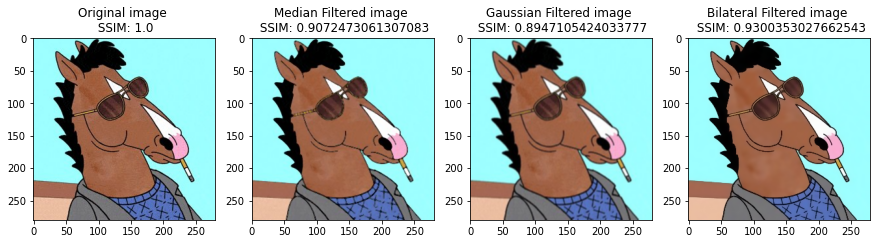

In [17]:
fig, axs = plt.subplots(1,4)    
fig.set_figwidth(15)
fig.set_figheight(15)
axs[0].imshow(img)
axs[0].set_title(f'Original image \n SSIM: {ssim_original}')   
axs[1].imshow(median_blurred) 
axs[1].set_title(f'Median Filtered image \n SSIM: {ssim_median}') 
axs[2].imshow(gaus)
axs[2].set_title(f'Gaussian Filtered image \n SSIM: {ssim_gaus}') 
axs[3].imshow(bilateral) 
axs[3].set_title(f'Bilateral Filtered image \n SSIM: {ssim_bilateral}') 

